# k Nearest Neighbors
## Classification
Реализуйте алгоритм к ближайших соседей. 
Создадим искуственный набор данных из 100 наблюдений с 3 классами.
Необходимо реализовать функцию на входе которой:
- тренировочный набор данных (признаки и метки классов);
- тестовый набор данных (признаки);
- $k$ - количество ближайших соседей.

На выходе функция должна возвращать метки тестового набора данных. 
В качестве расстояния между объектами следует использовать Эвклидову меру.

**Алгоритм к ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

В многоклассовой модели может возникнуть неопределенность, что в 3 найденных объектах будут присутсвовать разные классы. В этом случае необходимо присваивать класс, использую kNN при $k=1$.

In [564]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, RadiusNeighborsClassifier

In [565]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, cluster_std = 2, random_state=17)

Text(0.5, 1.0, 'Initial data')

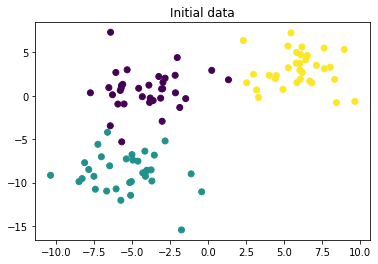

In [566]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

In [581]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 24)
k=5

In [582]:
def funct_kNN(x_train, y_train, x_test, k):
  x_tr_dist=[0] * len(x_train)
  kmin = []
  cl = [0]*k
  y_test = []
  for i in range(len(x_test)):
    for j in range(len(x_train)):
      x_tr_dist[j] =math.sqrt((x_train[j][0]-x_test[i][0])**2 + (x_train[j][1]-x_test[i][1])**2)
    kmin=np.partition(x_tr_dist, k)
    for m in range(k):
      cl[m]=y_train[x_tr_dist.index(kmin[m])]
    #print(cl)
    if (cl.count(0)>cl.count(1)) & (cl.count(0)>cl.count(2)):
      y_test.append(0)
    elif (cl.count(1)>cl.count(0)) & (cl.count(1)>cl.count(2)):
      y_test.append(1)
    else:
      y_test.append(2)
  return np.array(y_test)

Для корректного анализа построенного классификатора, разбейте исходный набор данных на тренировочный и тестовый.
Проверьте качество классификации для различных параметров $k = (1, \dots , 9)$ метрикой точность (Accuracy). Точность это отношение количества правильно классифицированных объектов ко всему количеству объектов.

In [569]:
output = []
for j in range(8):
  k=j+1
  output= np.isclose(y_test, funct_kNN(x_train, y_train, x_test, k)).tolist()
  output = output.count(True)
  accuracy=output/len(y_test)
  print(accuracy)

0.96
0.92
0.96
0.92
0.96
0.96
0.96
0.96


Постройте пример разделающих поверхностей для одного из значений $k$, которые строит классификатор.

Text(0.5, 1.0, 'Initial data')

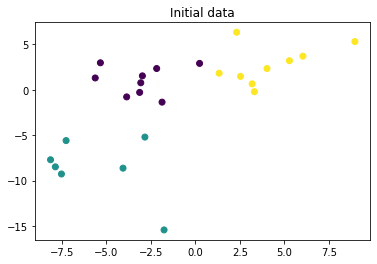

In [570]:
plt.scatter(x_test[:,0], x_test[:,1], c=funct_kNN(x_train, y_train, x_test, k))
plt.title('Initial data')

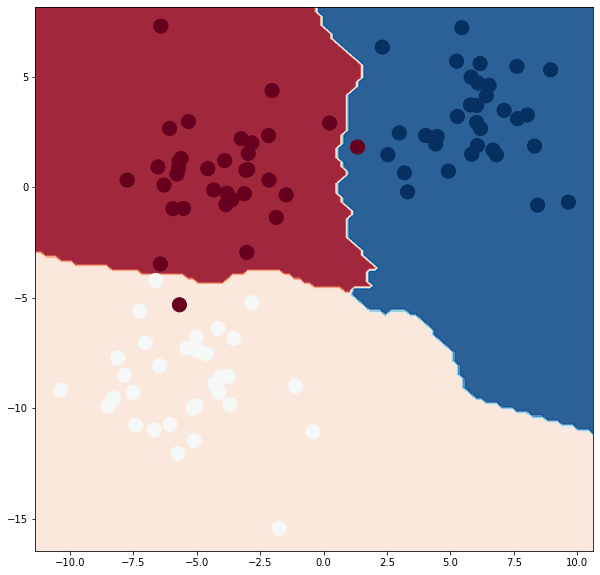

In [583]:
h = 0.2
x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = funct_kNN(X,Y,(np.vstack((xx.ravel(), yy.ravel())).transpose()),k)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.9)
plt.scatter(X[:,0], X[:,1], s=200, c = Y, cmap=plt.cm.RdBu)

1. Возьмите набор данных ирисов из sklearn. Разделите набор данных случайным образом на подвыборки train (подвыборка для обучения алгоритма) и test (подвыборка для тестирования алгоритма) в отношении 4:1. Постройте классификатор при $k=3$ и оцените работу классификатора метриками presicion, recall для каждого класса. \
$TP$ - количество правильно классифицированных объектов как класс $k$; \
$FP$ - количество неправильно классифицированных объектов как класс $k$; \
$TN$ - количество правильно классифицированных объектов как класса отличного от $k$; \
$FN$ - количество неправильно классифицированных объектов как класс $k$.

$$Presicion = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP + FN}$$
Проведите анализ вашего классификатора.

2. Разделите набор данных случайным образом на подвыборки train (подвыборка для обучения алгоритма) и test (подвыборка для тестирования алгоритма) в отношении 4:1 так, чтобы концентрации элементов в train и test были одинаковы. Тут необходимо уточнить, что концентрация подразумевается как равная вероятность взять случайный объект и получить класс $k$ для обоих подвыборок.
Постройте классификатор при $k=3$ и оцените работу классификатора метриками presicion, recall для каждого класса.

In [572]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
x = load_iris().data
y = load_iris().target

In [573]:
def f_kNN(x_train, y_train, x_test, k):
  x_tr_dist=[0] * len(x_train)
  kmin = []
  cl = [0]*k
  y_test = []
  for i in range(len(x_test)):
    for j in range(len(x_train)):
      x_tr_dist[j] = math.sqrt((x_train[j][0]-x_test[i][0])**2 + (x_train[j][1]-x_test[i][1])**2+ (x_train[j][2]-x_test[i][2])**2+ (x_train[j][3]-x_test[i][3])**2)
    kmin=np.partition(x_tr_dist, k)
    for m in range(k):
      cl[m]=y_train[x_tr_dist.index(kmin[m])]
    #print(cl)
    if (cl.count(0)>cl.count(1)) & (cl.count(0)>cl.count(2)):
      y_test.append(0)
    elif (cl.count(1)>cl.count(0)) & (cl.count(1)>cl.count(2)):
      y_test.append(1)
    else:
      y_test.append(2)
  return np.array(y_test)

In [574]:
output = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)
for j in range(8):
  k=j+1
  output= np.isclose(y_test, f_kNN(x_train, y_train, x_test, k)).tolist()
  output = output.count(True)
  accuracy=output/len(y_test)
  print(accuracy)

0.9333333333333333
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667


In [575]:
k = 3
y_predict = f_kNN(x_train, y_train, x_test, k)
accuracy = accuracy_score(y_test, y_predict)
metrics = classification_report(y_test, y_predict)
print('Accuracy:', accuracy)
print(metrics)

Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Постройте confusion matrix для каждого случая и проведите оценку работы классификатора. Для визуализации можно использовать seaborn.

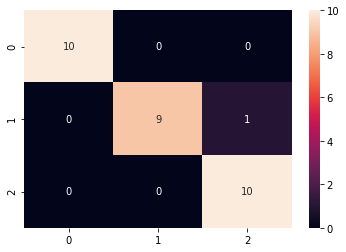

In [576]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
sn.heatmap(confusion_matrix(y_test, y_predict), annot=True)

## Regression
Напишите функцию для регрессии методом к ближайших соседей.

Для проверки вашего регрессионной модели создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренеровочную выборку. 
Задача: предсказать функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.

$y = sin(x)$

**Алгоритм регрессии:**

Для каждого тестового обекта:
1. вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
2. нахождение $k$ объектов с минимальными расстояниями;
3. вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

In [577]:
def f_reg_kNN(x_train, y_train, x_test, k):
  x_tr_dist=[0] * len(x_train)
  kmin = []
  a = []
  cl = [0]*k
  for i in range(len(x_test)):
    for j in range(len(x_train)):
      x_tr_dist[j] = math.sqrt((x_train[j]-x_test[i])**2)
    kmin=np.partition(x_tr_dist, k)
    for m in range(k):
      cl[m]=y_train[x_tr_dist.index(kmin[m])]
    a.append(sum(cl)/len(cl))
  return a

Постройте на одном графике исходную функцию, тренировочные объекты и предсказанные функции (с шагом 0.1 в диапазоне [0, 5]) для каждого значения $k$.

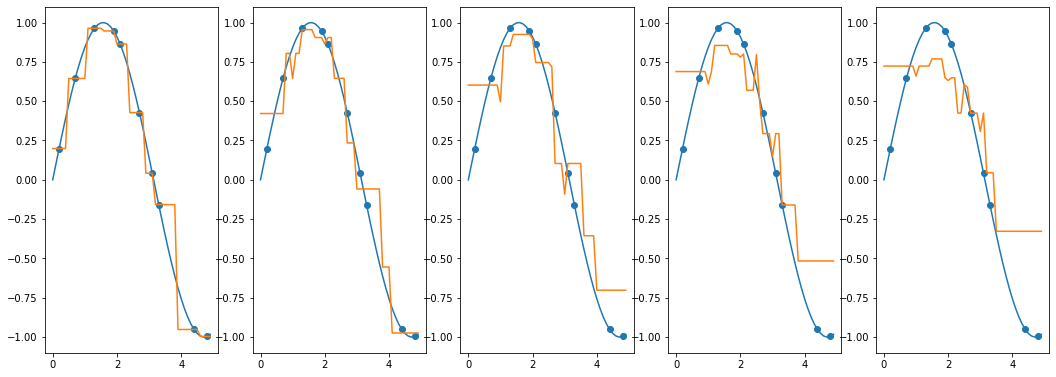

In [580]:
x_real = np.arange(0, 5, 0.1)
k=5
ax = [0] * k
fig = plt.figure(figsize=(18, 14))
for i in range(k):
  ax[i] = fig.add_subplot(k/2, k, i+1)
  i = i+1
  x = np.array([0.7, 1.3, 2.1, 3.3, 4.4, 0.2, 1.9, 2.7, 3.1, 4.8])
  y = np.sin(x)
  x_real = np.arange(0, 5, 0.1)
  y_real = np.sin(x_real)
  a = f_reg_kNN(x, y, x_real, i)
  ax[i-1] = plt.plot(x_real, y_real)
  ax[i-1] = plt.plot(x_real, a)
  ax[i-1] = plt.scatter(x, y)